<a href="https://colab.research.google.com/github/soniamaryc/RobotManipulator_Course/blob/main/IK_IterativeMethod_TwoLinkPlanarRobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def forward_kinematics(theta1, theta2, L1, L2):
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return np.array([x, y])

def compute_jacobian(theta1, theta2, L1, L2):
    J11 = -L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2)
    J12 = -L2 * np.sin(theta1 + theta2)
    J21 = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    J22 = L2 * np.cos(theta1 + theta2)
    return np.array([[J11, J12], [J21, J22]])

def ik_pose_jacobian(x_d, L1, L2, theta_init, max_iter=100, tol=0.01):
    theta = theta_init.copy()
    for i in range(max_iter):
        x_c = forward_kinematics(theta[0], theta[1], L1, L2)
        delta_x = x_d - x_c
        if np.linalg.norm(delta_x) < tol:
            print(f"Converged in {i+1} iterations")
            return theta
        J = compute_jacobian(theta[0], theta[1], L1, L2)
        if abs(np.linalg.det(J)) < 1e-6:
            print("Singularity encountered!")
            return None
        J_inv = np.linalg.inv(J)
        delta_theta = J_inv @ delta_x
        theta += delta_theta
    print("Failed to converge")
    return None

# Test
L1, L2 = 1.0, 1.0
x_d = np.array([1.5, 0.5])
theta_init = np.array([0.0, np.pi/2])
theta_sol = ik_pose_jacobian(x_d, L1, L2, theta_init)
if theta_sol is not None:
    print(f"θ₁ = {np.degrees(theta_sol[0]):.2f}°, θ₂ = {np.degrees(theta_sol[1]):.2f}°")
    x_final = forward_kinematics(theta_sol[0], theta_sol[1], L1, L2)
    print(f"Final pose: x = {x_final[0]:.3f}, y = {x_final[1]:.3f}")

Converged in 4 iterations
θ₁ = -19.33°, θ₂ = 75.53°
Final pose: x = 1.500, y = 0.500


Converged after 19 iterations.


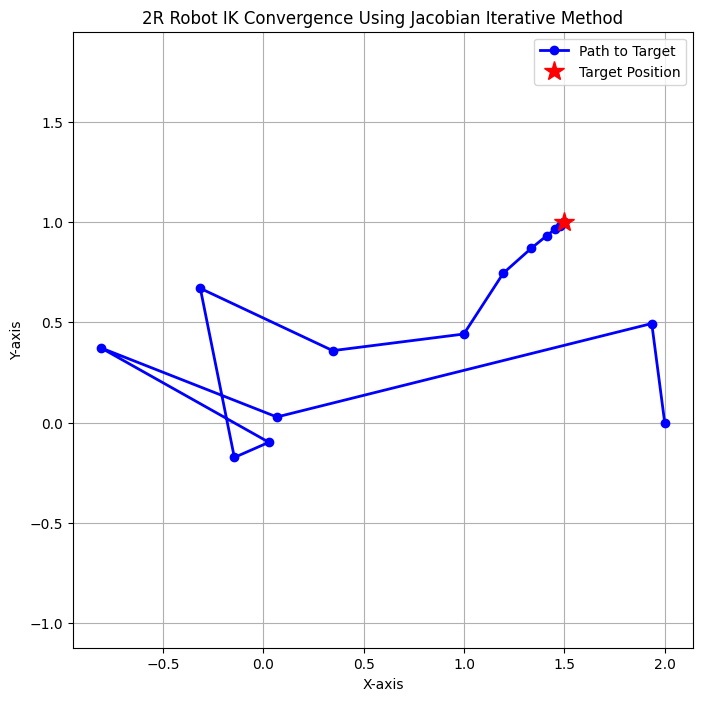

Final Joint Angles (radians): [7.32010089 5.38529389]
End-Effector Final Position: [1.49922956 0.99941549]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Robot Parameters
L1, L2 = 1.0, 1.0  # Link lengths

# Forward Kinematics Function
def forward_kinematics(theta):
    theta1, theta2 = theta
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return np.array([x, y])

# Jacobian Matrix Calculation
def jacobian(theta):
    theta1, theta2 = theta
    J = np.array([
        [-L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2), -L2 * np.sin(theta1 + theta2)],
        [L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2),  L2 * np.cos(theta1 + theta2)]
    ])
    return J

# Iterative IK Solver
def inverse_kinematics(target, initial_theta, max_iter=100, tolerance=1e-3, alpha=0.5):
    theta = np.array(initial_theta, dtype=float)
    trajectory = [forward_kinematics(theta)]

    for i in range(max_iter):
        current_position = forward_kinematics(theta)
        error = target - current_position

        # Check convergence
        if np.linalg.norm(error) < tolerance:
            print(f"Converged after {i+1} iterations.")
            break

        # Jacobian and Pseudo-inverse calculation
        J = jacobian(theta)
        J_pinv = np.linalg.pinv(J)

        # Joint update
        delta_theta = alpha * J_pinv.dot(error)
        theta += delta_theta

        # Save trajectory
        trajectory.append(forward_kinematics(theta))

    return theta, np.array(trajectory)

# Define target and initial guess
target_position = np.array([1.5, 1.0])
initial_angles = [0.0, 0.0]

# Run IK solver
final_angles, trajectory = inverse_kinematics(target_position, initial_angles)

# Visualization of convergence
plt.figure(figsize=(8, 8))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-', linewidth=2, label='Path to Target')
plt.plot(target_position[0], target_position[1], 'r*', markersize=15, label='Target Position')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2R Robot IK Convergence Using Jacobian Iterative Method')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Final results
print(f"Final Joint Angles (radians): {final_angles}")
print(f"End-Effector Final Position: {trajectory[-1]}")
